<a href="https://colab.research.google.com/github/cokeman421/BCDU-Net/blob/master/Set_B_Bank_Telemarketing_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Set Information:** 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed

##**Attribute Information:**
**Bank client data:**
* Age (numeric)
* Job : type of job
* Marital : marital status
* Education 
* Default: has credit in default?
* Housing: has housing loan? 
* Loan: has personal loan?

**Related with the last contact of the current campaign:**
* Contact: contact communication type
* Month: last contact month of year
* Day_of_week: last contact day of the week
* Duration: last contact duration, in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**
* Campaign: number of contacts performed during this campaign and for this client 
* Pdays: number of days that passed by after the client was last contacted from a previous campaign ( 999 means client was not previously contacted)
* Previous: number of contacts performed before this campaign and for this client (numeric)
* Poutcome: outcome of the previous marketing campaign

**Social and economic context attributes**
* Emp.var.rate: employment variation rate - quarterly indicator
* Cons.price.idx: consumer price index - monthly indicator
* Cons.conf.idx: consumer confidence index - monthly indicator
* Euribor3m: euribor 3 month rate - daily indicator
* Nr.employed: number of employees - quarterly indicator

**Output variable (desired target):**
* y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## **1. Exploratory Data Analysis**

### **1) Preliminary Data Processing**

#### **Set-up for data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")  # "ignore": Never print matching warnings

#### **a) Preview Data**

In [ ]:
# upload banks_campaign.csv
df = pd.read_csv("bank_campaigns.csv")
df

# https://bit.ly/3x1u5TJ --> dataset link

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,NaN,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### **b) Check total number of entries and column types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40912 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41186 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,NaN,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### **c) Basic Demonstration - Example: Marital**

---



The frequency distribution of categories within the feature can be done with the .value_counts() method.

In [ ]:
df.subscribed.value_counts()

no     36548
yes     4640
Name: subscribed, dtype: int64

Similarly, you could plot charts to get the same information. 

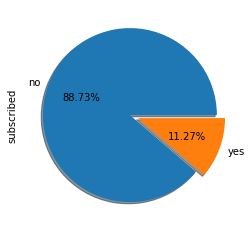

In [ ]:
df.subscribed.value_counts().plot.pie(autopct="%.2f%%",explode=[0,0.1], shadow=True)

In [ ]:
# create a bar chart showing the amount of individuals in each marital status using seaborn

Sample Ans:

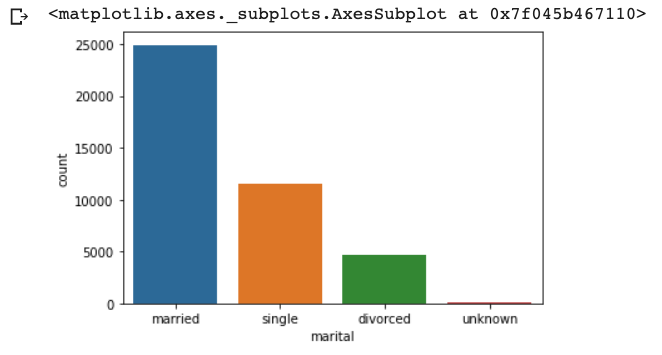

In [ ]:
# create a bar chart showing the rate of subscription according to marital status

Sample Ans:

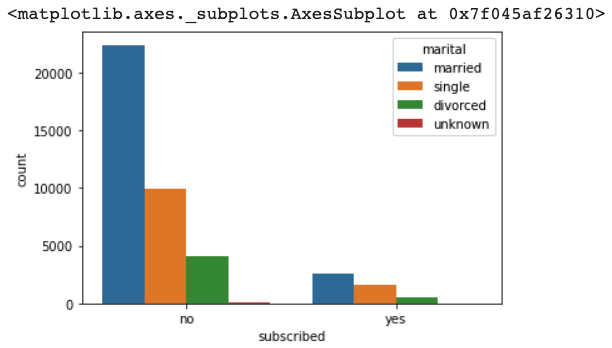

In [ ]:
# create a bar chart showing the rate of subscription according to job occupied

Sample Ans:

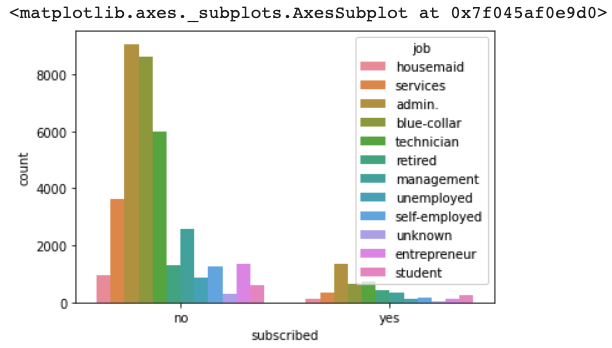

### **2) Categorical Features**

**Types of Categorical features:**
1.   Nominal features/Categorical features
> Marital, Job, Subscribed

2.   Ordinal features
> Education

3.   Continuous features
> Age

#### **a) Analyzing the Nominal / Categorical Features(Example: Marital)**

In [ ]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [ ]:
df.subscribed.value_counts()

no     36548
yes     4640
Name: subscribed, dtype: int64

In [ ]:
df.groupby(["marital","subscribed"]).count()["job"]
#groupby categorical data are put on the rows, numeric data are placed on the columns

marital   subscribed
divorced  no             4136
          yes             476
married   no            22396
          yes            2532
single    no             9948
          yes            1620
unknown   no               68
          yes              12
Name: job, dtype: int64

Initial counts in the marital band sees an increase in subscriptions for clients who have never been married, or have unknown marital status.

This seems to be an important feature for modeling.

#### **b) Analyzing the Ordinal Features(Example: Education)**

In [ ]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
pd.crosstab(index=df["education"],columns=df["subscribed"],margins=True)
# margins: Add row/column margins (subtotals).

subscribed,no,yes,All
education,,,
basic.4y,3748,428,4176
basic.6y,2104,188,2292
basic.9y,5572,473,6045
high.school,8484,1031,9515
illiterate,14,4,18
professional.course,4648,595,5243
university.degree,10498,1670,12168
unknown,1480,251,1731
All,36548,4640,41188


In [ ]:
pd.crosstab(index=df["education"],columns=df["subscribed"], normalize="index")
# normalize = "index", showcase as percentages of each row

subscribed,no,yes
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


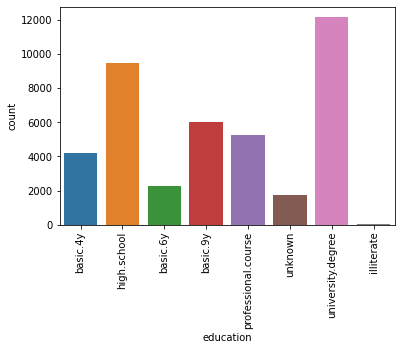

In [ ]:
sns.countplot(x="education", data=df)
plt.xticks(rotation=90)
plt.show()

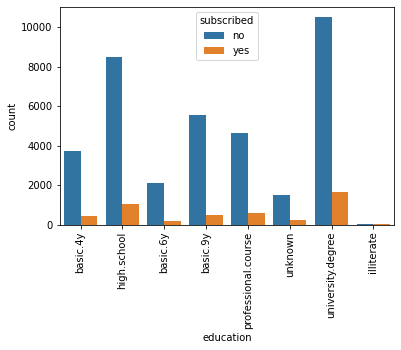

In [ ]:
sns.countplot(x="education", data=df, hue="subscribed")
plt.xticks(rotation=90)
plt.show()

More customers either completed high school or had a university degree! It also seems that the percentage of clients who have subscribed increases as education level increases as well, with the anoamly being illiterate clients.

So marital status and education both somewhat matter.

#### **c) Analyzing the Continuous Features(Example: Age)**

In [ ]:
# find average age of all individuals

### **3) Checking for null values**

In [ ]:
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


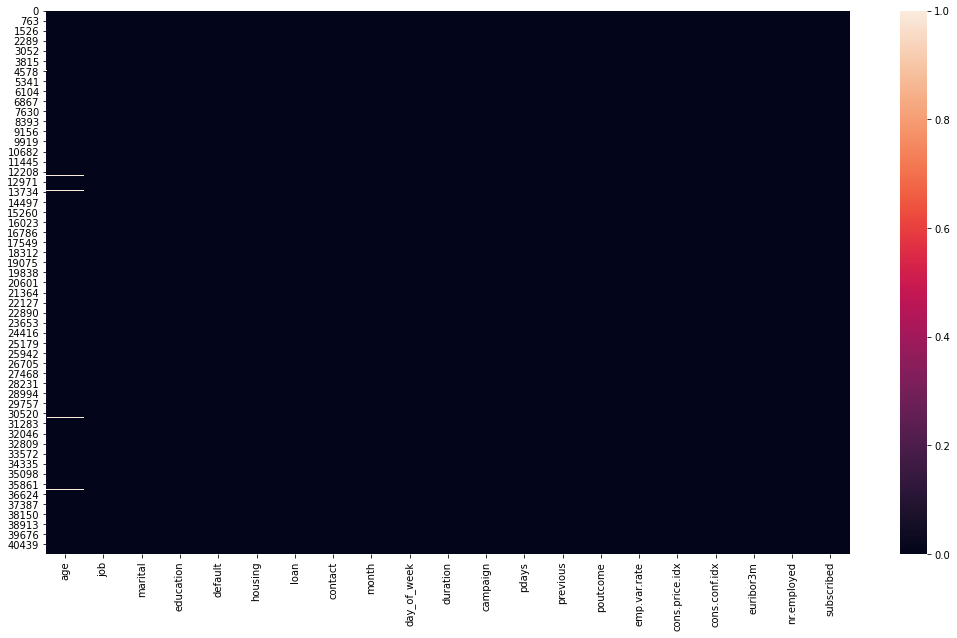

In [ ]:
# method 1: seaborn.heatmap
plt.figure(figsize=(18,10)) #increase size
sns.heatmap(df.isnull())

In [ ]:
# use pandas methods to show the amount of missing values per column

## **2. Data Cleaning**

### **1) Filling the null data**

#### **Example 1: Filling NaN Ages**

The Age feature has 276 null values. To replace these NaN values, we can assign them the mean age of the dataset.

##### **Using mean age of Job**
There is a higher difference of mean values of ages in jobs. It may be a better indicator of filling in missing values of age.

##### **Group Challenge: Use mean age of Job to fill missing values in Age column**

* keep original values of age if it exists
* fill missing values of age with average age of respective job


Sample Ans:

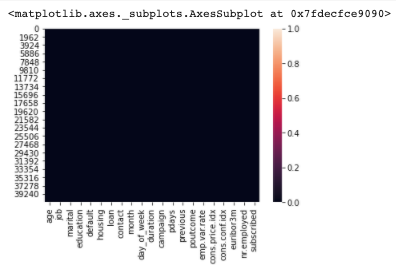

#### **Example 2: Filling poutcome NaN**

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          2
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [ ]:
# previous outcome of campaign 
df.poutcome.value_counts()

nonexistent    35561
failure         4252
success         1373
Name: poutcome, dtype: int64

From the data, we can see that an overwhelming amount of clients were not contacted previously. Hence, the missing values should be replaced with nonexistent.

In [ ]:
# .fillna()
df.poutcome.fillna("nonexistent",inplace=True)

## **3. Feature Engineering**

### **A. Transformation of Features' types**

#### **2) Converting Nominal/Categorical Data into Ordinal Data**

We cannot pass **strings** to a machine learning model, therefore we need to convert features like job, marital, etc into **numeric values**.

##### **a. job**

In [ ]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
df.job.nunique()

12

In [ ]:
df.job.replace(df.job.unique(),range(0,12),inplace=True)
# don't put inplace until you can confirm the changes

In [ ]:
df.job

0        0
1        1
2        1
3        2
4        1
        ..
41183    5
41184    3
41185    5
41186    4
41187    5
Name: job, Length: 41188, dtype: int64

##### **b. marital**

In [ ]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [ ]:
df.marital.replace(df.marital.unique(),[0,1,2,3],inplace=True)

In [ ]:
df.marital.value_counts()

0    24928
1    11568
2     4612
3       80
Name: marital, dtype: int64

##### **c. subscribed**

In [ ]:
df.subscribed.value_counts()

no     36548
yes     4640
Name: subscribed, dtype: int64

In [ ]:
df.subscribed.replace(["no","yes"],[0,1],inplace=True)
# better to list out here as you want to ensure that no is 0 and yes is 1

In [ ]:
df.subscribed.value_counts()

0    36548
1     4640
Name: subscribed, dtype: int64

##### **d. edu_clean**

In [ ]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
df.education.nunique()

8

In [ ]:
df.education.replace(df.education.unique(),range(0,8),inplace=True)

In [ ]:
df.education.value_counts()

6    12168
1     9515
3     6045
4     5243
0     4176
2     2292
5     1731
7       18
Name: education, dtype: int64

##### **e. contact**

In [ ]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [ ]:
df.contact.replace(["cellular","telephone"],[0,1], inplace=True)

In [ ]:
df.contact.value_counts()

0    26144
1    15044
Name: contact, dtype: int64

##### **f. poutcome**

In [ ]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
# transform poutcome into ordinal values

Sample Ans:

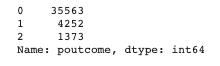

##### **g. month**

In [ ]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
# transform month into ordinal values

Sample Ans:

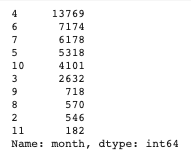


##### **h. day_of_week**

In [ ]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
# transform day of week into ordinal values

Sample Ans:

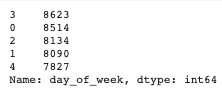

### **B. Creating New Features**

##### **a) debt**
*   "default": Has any defaulted credit.
*   "housing": Has any housing loans.
*   "loan": Has any personal loans. 

All of these columns are indicators of clients holding debt. It may be a good indicator as to whether the client has the ability to pay for the subscription offered by the bank.

In [ ]:
# function to go through every single row to see whether any clients have existing debt
def find_debt(x):
    default_loan=x[0]
    house_loan=x[1]
    personal_loan=x[2]
    
    if default_loan == "yes" or house_loan == "yes" or personal_loan == "yes":
        return 1
    else:
        return 0

In [ ]:
df[["default","housing","loan"]].apply(find_debt, axis=1)

0        0
1        0
2        1
3        0
4        1
        ..
41183    1
41184    0
41185    1
41186    0
41187    1
Length: 41188, dtype: int64

In [ ]:
df["debt"] = df[["default","housing","loan"]].apply(find_debt, axis=1)
df["debt"]

0        0
1        0
2        1
3        0
4        1
        ..
41183    1
41184    0
41185    1
41186    0
41187    1
Name: debt, Length: 41188, dtype: int64

In [ ]:
df.debt.value_counts()

1    24135
0    17053
Name: debt, dtype: int64

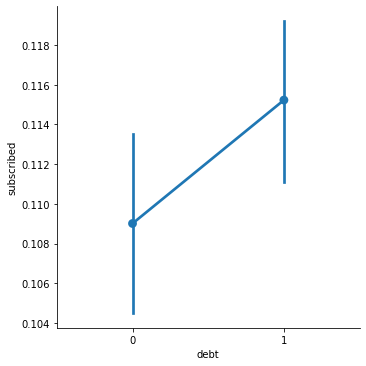

In [ ]:
sns.factorplot(x="debt",y="subscribed",data=df)

Given that the product is a bank term deposit, you would think it would be more attractive to clients who don't have debt, but the data doesn't reflect this at all!

### **C. Dropping Unneeded Features**

For example:

*   default,housing,loan: We are using debt column

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,debt
0,56.0,0,0,0,no,no,no,1,may,mon,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57.0,1,0,1,unknown,no,no,1,may,mon,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37.0,1,0,1,no,yes,no,1,may,mon,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40.0,2,0,2,no,no,no,1,may,mon,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56.0,1,0,1,no,no,yes,1,may,mon,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1


In [ ]:
# create a dataframe named df2
# remove columns "default","housing","loans"

Sample Ans:

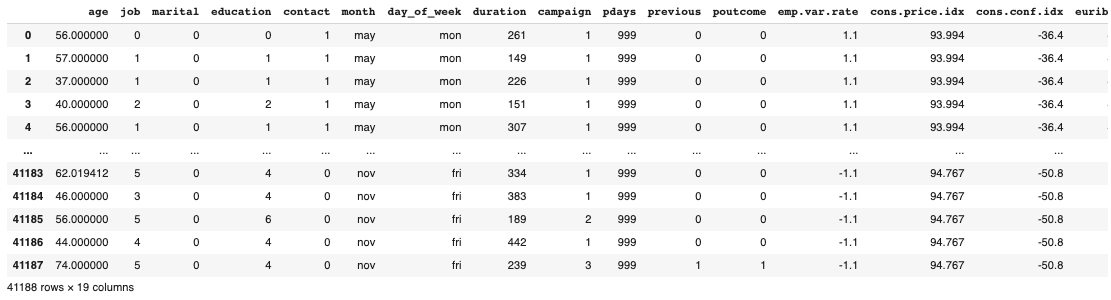

#### **Correlation Between The Features**

*   Positive Correlation
*   Negative Correltion

In [ ]:
# create a heatmap containing a correlation table of the columns

Sample Ans:

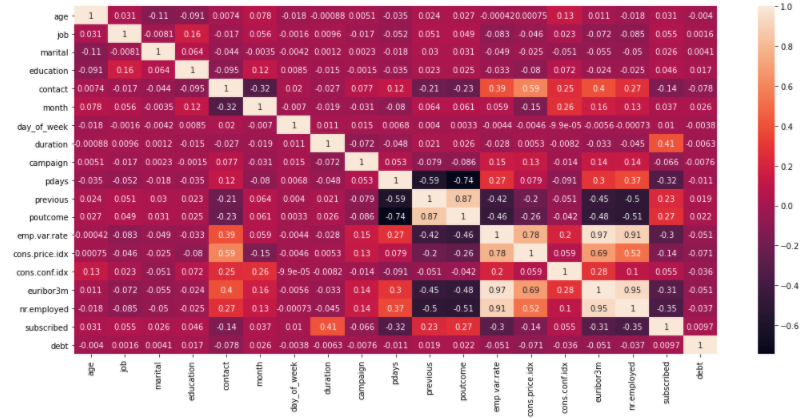